In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from numpy.lib.stride_tricks import sliding_window_view

In [72]:
lines = []
id = [23]
for i in id:
  with open(f"Dane\Learning_data\wind_min_merge_{i}.lst", "r") as file:
    for line in file:
      lines.append(line.split()[4:])

In [73]:
df = pd.DataFrame(lines, columns=["Field_Magnitude", "Bx", "By", "Bz", "Vx", "Vy", "Vz", "Xgse", "Ygse", "Zgse"], dtype = float)

In [74]:

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527040 entries, 0 to 527039
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Field_Magnitude  527040 non-null  float64
 1   Bx               527040 non-null  float64
 2   By               527040 non-null  float64
 3   Bz               527040 non-null  float64
 4   Vx               527040 non-null  float64
 5   Vy               527040 non-null  float64
 6   Vz               527040 non-null  float64
 7   Xgse             527040 non-null  float64
 8   Ygse             527040 non-null  float64
 9   Zgse             527040 non-null  float64
dtypes: float64(10)
memory usage: 40.2 MB
None
   Field_Magnitude    Bx    By    Bz       Vx       Vy       Vz     Xgse  \
0             8.24 -6.11  2.85 -4.64  99999.9  99999.9  99999.9  9999.99   
1             8.10 -6.22  2.65 -4.45   -376.5    -38.7     26.2  9999.99   
2             7.93 -6.03  3.10 -3.12   -376.5    -

In [75]:
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7): int(n*0.9)]
test_df = df[int(n*0.9):]

print("Training length:", len(train_df))
print("Validation length:", len(val_df))
print("Test length:", len(test_df))

Training length: 368928
Validation length: 105408
Test length: 52704


C:\Users\erosiak\AppData\Local\Temp\ipykernel_6316\2026671614.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(df.keys(), rotation=90)


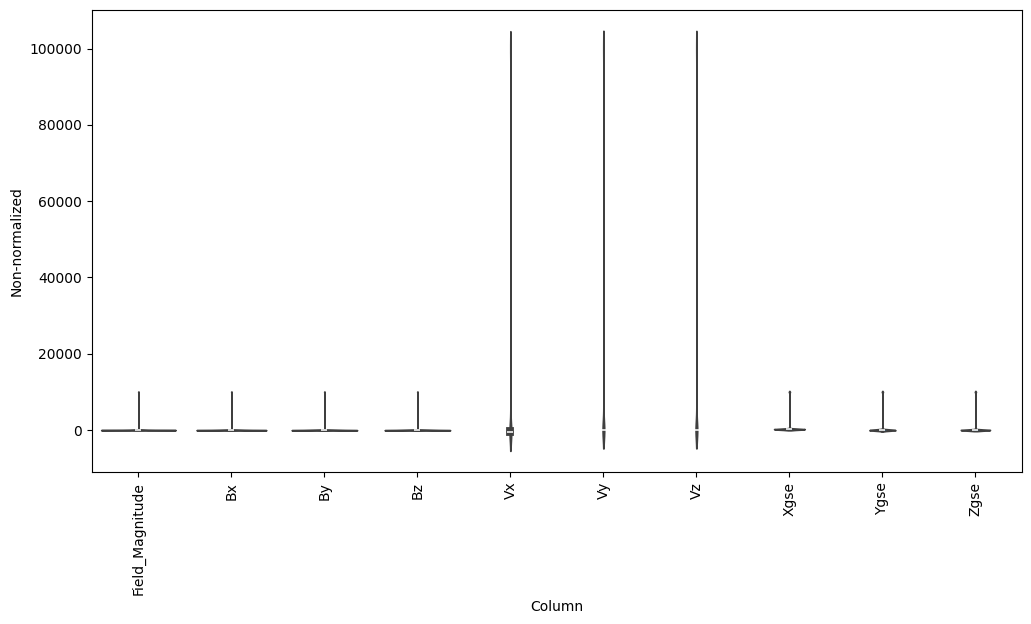

In [76]:
df_non = df.copy()
df_non = df_non.melt(var_name='Column', value_name='Non-normalized')

plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Non-normalized', data=df_non)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [77]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368928 entries, 0 to 368927
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Field_Magnitude  368928 non-null  float64
 1   Bx               368928 non-null  float64
 2   By               368928 non-null  float64
 3   Bz               368928 non-null  float64
 4   Vx               368928 non-null  float64
 5   Vy               368928 non-null  float64
 6   Vz               368928 non-null  float64
 7   Xgse             368928 non-null  float64
 8   Ygse             368928 non-null  float64
 9   Zgse             368928 non-null  float64
dtypes: float64(10)
memory usage: 28.1 MB
None


In [78]:
np.save("Dane/Learning_data/data/train_test.npy", train_df)

In [79]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

C:\Users\erosiak\AppData\Local\Temp\ipykernel_6316\4159823060.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(df.keys(), rotation=90)


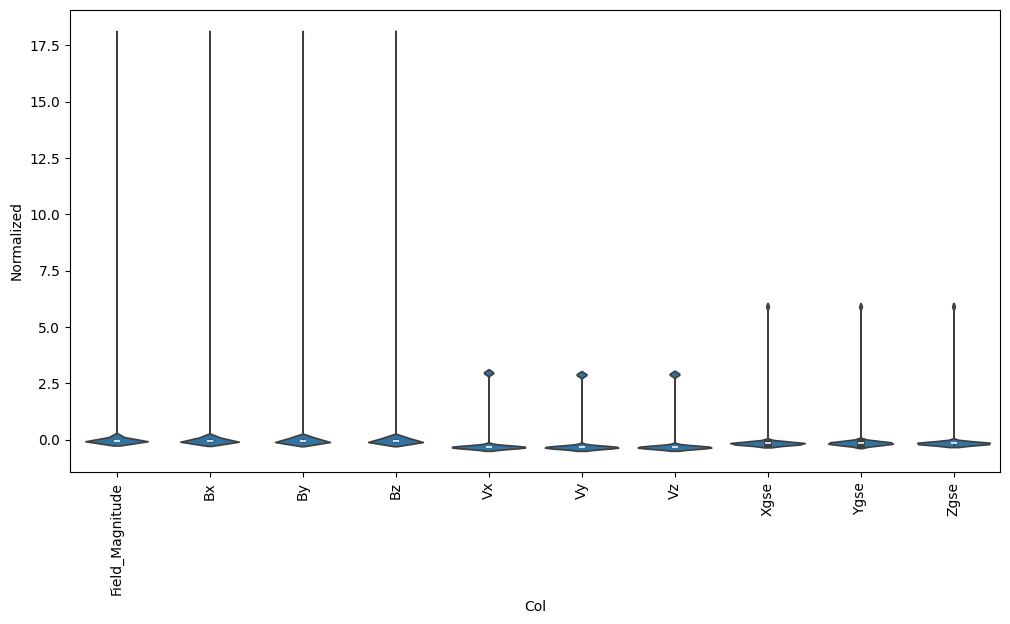

In [80]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Col', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Col', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [82]:
window_size = 120
data_sliced_train = sliding_window_view(train_df, window_shape=window_size, axis = 0)[::10]
data_sliced_val = sliding_window_view(val_df, window_shape=window_size, axis = 0)[::10]
data_sliced_test = sliding_window_view(test_df, window_shape=window_size, axis = 0)[::10]


In [83]:
np.save("Dane/Learning_data/data/train_df_23_w120.npy", data_sliced_train) 
np.save("Dane/Learning_data/data/val_df_23_w120.npy", data_sliced_val)
np.save("Dane/Learning_data/data/test_df_23_w120.npy", data_sliced_test)